In [1]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 현재 경로 확인
!pwd

/content


In [3]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

/content/drive/My Drive/Colab Notebooks


# Tensorflow 

## 모델을 만드는 여러가지 표현 방법

### Sequential

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
model = tf.keras.models.Sequential()

In [6]:
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Dense(2))

In [11]:
x = tf.constant([[1,2]])
y = tf.constant([[1,2],[2,3]])

In [8]:
model(x) 

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.3294789, 0.589738 ]], dtype=float32)>

In [9]:
model.built

True

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (1, 2)                    6         
_________________________________________________________________
dense_1 (Dense)              (1, 2)                    6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [12]:
model(y)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.3294789 , 0.589738  ],
       [0.2781678 , 0.97357416]], dtype=float32)>

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.keras.layers.InputLayer

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(2,))) # 두 개의 값을 갖는 1차원 데이터를 받겠다 (데이터의 개수는 상관없이 받는다)
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Dense(2))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [18]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(2,))) # input layer를 추가하지 않고 줄여서 사용할 수 있다 
model.add(tf.keras.layers.Dense(2))

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2, input_shape=[2]), # (2,)처럼 튜플 형태말고 리스트 형태로도 표현할 수 있다 
  tf.keras.layers.Dense(2)
])

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


### Model

In [27]:
inputs = tf.keras.Input(shape=(2,)) # tensor 
x = tf.keras.layers.Dense(2)(inputs)s
outputs = tf.keras.layers.Dense(2)(x)

In [28]:
model = tf.keras.models.Model(inputs, outputs) # input과 output을 같이 인자로 넣어줘야 한다 / 그리고 input으로 tensor를 받아야 한다 

In [29]:
model.summary() # input layer가 명시된다 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 6         
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [30]:
inputs = tf.keras.layers.InputLayer(input_shape=(2,)) # layer
x = tf.keras.layers.Dense(2)(inputs) # tensor를 인자로 받아야 한다 
outputs = tf.keras.layers.Dense(2)(x)

TypeError: ignored

In [40]:
inputs1 = tf.keras.Input(shape=(2,))
inputs2 = tf.keras.Input(shape=(2,))
x1 = tf.keras.layers.Dense(2)(inputs1)
x2 = tf.keras.layers.Dense(2)(inputs2) 
outputs1 = tf.keras.layers.Dense(2)(x1)
outputs2 = tf.keras.layers.Dense(2)(x2)

model = tf.keras.models.Model([inputs1, inputs2], [outputs1,outputs2])

In [35]:
model.summary() # InputLayer나 connected to가 있을 경우 Model로 만들었다는 의미 이다 

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_19 (Dense)                (None, 2)            6           input_8[0][0]                    
__________________________________________________________________________________________________
dense_20 (Dense)                (None, 2)            6           input_9[0][0]                    
____________________________________________________________________________________________

```
Sequential과 달리 input layer와 output layer를 두 개 이상 받을 수 있다 
```

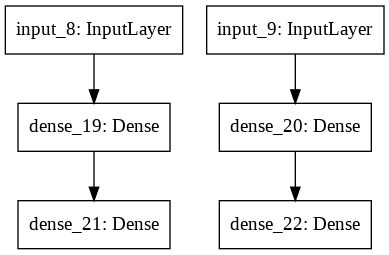

In [36]:
tf.keras.utils.plot_model(model)

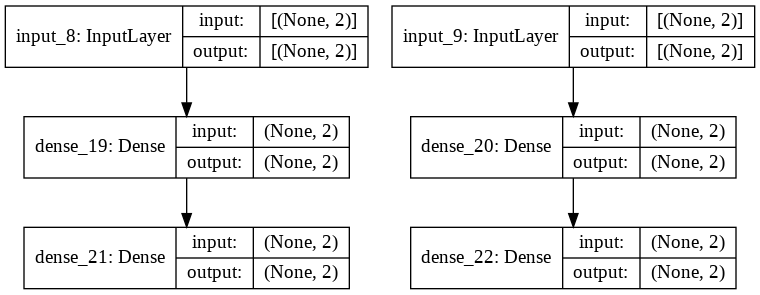

In [37]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [5]:
inputs1 = tf.keras.Input(shape=(2,))
inputs2 = tf.keras.Input(shape=(2,))
x1 = tf.keras.layers.Dense(2)(inputs1)
x2 = tf.keras.layers.Dense(2)(inputs2) 
outputs1 = tf.keras.layers.Add()([x1,x2])
outputs2 = tf.keras.layers.Subtract()([x1,x2])

model = tf.keras.models.Model([inputs1, inputs2], [outputs1,outputs2])

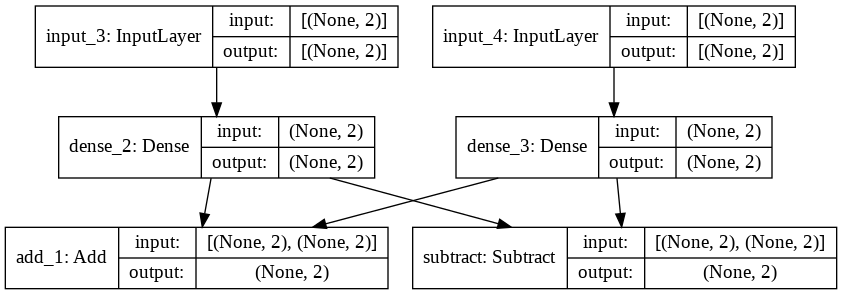

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Model과 Sequential을 동시에 활용하는 방법

In [7]:
se = tf.keras.models.Sequential([
  tf.keras.layers.Dense(2),
  tf.keras.layers.Dense(2)                                 
])

In [10]:
inputs_ = tf.keras.Input(shape=(3,))
outputs = se(inputs_)
model = tf.keras.models.Model(inputs_, outputs)

In [11]:
model

In [12]:
model.summary() # 모델 안에 모델을 넣지는 않지만 단순화 하기 위해서 모델 안에 sequential을 넣는 방법을 사용하는 경우는 많다  

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
sequential (Sequential)      (None, 2)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### 데이터 시각화로 Balanced data인지 구별하기

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

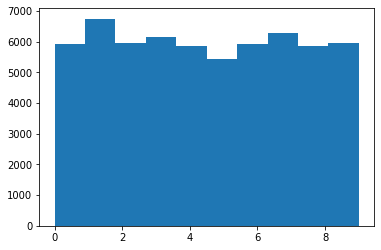

In [10]:
plt.hist(y_train) # blanced data

## MLP

In [ ]:
# numerical stability => input이 있으면 output이 있어야 한다 

In [11]:
# Normalization 
X_train = X_train / 255 # coersion
X_test = X_test / 255

```
preprocessing을 모델 안에서 하는지 모델 밖에서 하는지 결정해야 한다

Inside model 
- portability, 편리하다 
- GPU 연산이 가능하다 

Outside model 
- 데이터의 형태에 제약이 없어 범용성이 있다 
- 기본적으로 CPU방식이지만 CPU + GPU방식을 쓸 수 있다 
```

```
tensorflow에서는 3차원,즉 흑백 이미지는 (Batch(size), H, W)로 받아들인다 
4차원(color 이미지) 일때는 (B, H, W, C) 또는 (B, C, H, W)(theano 기본)으로 받아들인다  
```

### Flatten

In [12]:
tf.keras.layers.Flatten()(X_train) # 함수 밖에서 사용하면 cpu로 연산한다  

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [34]:
X_train_bw = X_train.reshape(60000, 28, 28, 1)

In [35]:
tf.keras.layers.Flatten()(X_train_bw) 

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [36]:
X_train_bw.flatten().shape

(47040000,)

```
numpy에서 flatten은 모든 것을 1차원으로 만들어 준다 
```


In [37]:
'__call__' in dir(tf.keras.layers.Flatten()) # instance => Function 

True

## MLP를 만드는 다양한 방법

In [13]:
input_ = tf.keras.Input(shape=(28,28)) 
x = tf.keras.layers.Flatten()(input_) # 1차가 되었기 때문에 fully conntected 모델을 사용할 수 있다 
x = tf.keras.layers.Dense(128, activation='relu')(x) # Dense에는 하나의 데이터가 1차원인 경우에만 집어 넣을 수 있다 

In [14]:
x

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_6')>

In [15]:
input_ = tf.keras.Input(shape=(28,28))
x = tf.keras.layers.Dense(128, activation='relu')(input_) # 2차원 값을 Dense에 넣으면 원하는 output을 만들어 낼 수 없다

In [16]:
x

<KerasTensor: shape=(None, 28, 128) dtype=float32 (created by layer 'dense_7')>

### Option1

In [ ]:
input_ = tf.keras.Input(shape=(28,28)) 
x = tf.keras.layers.Flatten()(input_) 
x = tf.keras.layers.Dense(2)(x)
x = tf.keras.layers.Activation('relu')(x) # 또는 x = tf.keras.layers.ReLU()(x)
# Activation layer를 따로 두는 이유는 Batch Normalization을 하기 위해서 이다  

## Option2

In [38]:
input_ = tf.keras.Input(shape=(28,28)) 
x = tf.keras.layers.Flatten()(input_) 
x= tf.keras.layers.Dense(128, activation='relu')(x)

In [18]:
input_ = tf.keras.Input(shape=(28,28)) 
x = tf.keras.layers.Flatten()(input_) 
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.ReLU()(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(10, activation='softmax')(x) # Batch Normalization과 상관 없기 때문에 관례상 마지막은 단축 표현을 쓴다 

In [19]:
model = tf.keras.models.Model(input_, output)

In [20]:
model.summary() # param이 0인 경우 학습하지 않아도 되는 단순한 연산이다 

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
re_lu (ReLU)                 (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_____________________________________________________

```
neural network parameter 구하는 법
입력값 (28x28) X dense layer nodes(128) + dense layer bias(128) = 100480
```

In [39]:
model.weights[0] # tensorflow에서는 weight를 kernel라고 부른다 그리고 weight는 kernel + bias를 지칭한다 / kernel은 glorot방식으로 초기화 된다(학습이 빠르고 잘 수렴되는 초기화 방식)

<tf.Variable 'dense_7/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[-0.00481777, -0.05054575, -0.066313  , ...,  0.01311962,
         0.04805059,  0.00298249],
       [ 0.07520033, -0.01051669,  0.00903524, ..., -0.07472851,
         0.01202653, -0.00115251],
       [-0.01647546, -0.03879095, -0.03718614, ..., -0.05494369,
        -0.05540787,  0.05530912],
       ...,
       [-0.00182921,  0.07649232, -0.07937535, ...,  0.05838447,
         0.05726648, -0.03632762],
       [-0.00923116,  0.01400795, -0.05262435, ..., -0.07948828,
         0.01813819, -0.02076239],
       [-0.01461188,  0.07456786,  0.0081539 , ...,  0.01914987,
         0.07928162, -0.03385995]], dtype=float32)>

In [40]:
model.weights[1]

<tf.Variable 'dense_7/bias:0' shape=(128,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [41]:
model.weights[2]

<tf.Variable 'dense_8/kernel:0' shape=(128, 10) dtype=float32, numpy=
array([[-0.01635328,  0.00763369,  0.13723023, ..., -0.18139066,
         0.09355612,  0.14300655],
       [-0.06704196, -0.12000238,  0.20172156, ...,  0.0606968 ,
        -0.02551591, -0.10963563],
       [ 0.00977565, -0.11188473,  0.15327264, ...,  0.12097086,
         0.00371699,  0.11089064],
       ...,
       [ 0.15975083, -0.12796631, -0.12143513, ...,  0.00048973,
         0.08025642,  0.09352569],
       [-0.10482513, -0.00614406,  0.16832988, ...,  0.1809843 ,
         0.16601638, -0.18317826],
       [ 0.10724227,  0.1758986 ,  0.03089926, ...,  0.09623767,
         0.0754603 , -0.14214656]], dtype=float32)>

In [42]:
model.weights[3]

<tf.Variable 'dense_8/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [22]:
model.trainable_weights == model.trainable_variables

True

In [24]:
model.trainable_weights is model.trainable_variables

False

In [21]:
model.trainable_weights

[<tf.Variable 'dense_8/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[-0.05531485, -0.07744511, -0.0746323 , ..., -0.06485563,
         -0.05913215, -0.03761471],
        [ 0.00124295,  0.07567873,  0.00529402, ...,  0.03713652,
         -0.03533567,  0.02690652],
        [ 0.06762456, -0.02606952, -0.03866001, ...,  0.0321365 ,
         -0.05224103, -0.03288466],
        ...,
        [ 0.05756753,  0.03487769, -0.04956114, ...,  0.07006838,
         -0.04104863, -0.08020123],
        [ 0.03739367,  0.05591244,  0.0753384 , ...,  0.0743489 ,
          0.00566504, -0.05400074],
        [-0.00660357, -0.06026491, -0.07941656, ..., -0.05506966,
         -0.06525376, -0.05522396]], dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(128,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

## Learning

```python
학습시키는 두 가지 방법 

1. compile 방식 => computational graph 형태로 변환 시켜준다 / 내가 만든 모델이 tensorflow에서 지원해준다  
2. 직접 구현하는 방식 
```